# Multivariate Linear Regression

In [1]:
import numpy as np
data = np.loadtxt('data/ex1data2.txt', delimiter=',', dtype=np.float64)
print('Dataset size: ', data.shape)

Dataset size:  (47, 3)


In [2]:
X = data[:, :2]
y = data[:, -1]

y = np.reshape(y, (y.shape[0], 1))

m = X.shape[0]
print('Training examples : {}'.format(m))
n = X.shape[1]
print('Features: {}'.format(n))

print('10 examples: \n', X[:10, :])

Training examples : 47
Features: 2
10 examples: 
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]


## Feature Normalization
### When we have a problem with multiple features, it is important to make sure that the features are on a similar scale; in fact if we have features with different range of values, the gradient descent takes a long time before reaching the minimum. Then we need to normalize some features in order to work with the same scale. The feature normalization can be expressed as follows
$$\large x_{i_{norm}} = \frac{x_i - \mu_i}{\sigma_i} $$
### where
$$\large \mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)} $$
$$\large \sigma_i = \sqrt{\frac{\sum_{j=1}^m x_i^{(j)}-\mu_i}{m}} $$

In [3]:
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    for i in range(X.shape[1]):
        X_norm[:, i] = (X[:, i] - mu[i])/sigma[i]
        
    return X_norm, mu, sigma

In [4]:
X_norm, mu, sigma = featureNormalize(X)
print(X_norm[:10, :])
print(mu)
print(sigma)

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]
 [-0.01994505  1.10220517]
 [-0.59358852 -0.22609337]
 [-0.72968575 -0.22609337]
 [-0.78946678 -0.22609337]
 [-0.64446599 -0.22609337]]
[2000.68085106    3.17021277]
[7.86202619e+02 7.52842809e-01]


In [5]:
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print(X_norm.shape)

(47, 3)


### We used the following model:
$$\large h_{\theta}(x) = {\theta_0} + {\theta_1}x_1 + {\theta_2}x_2$$
### Cost function vectorized:
$$\large J({\theta}) = \frac{1}{2m} (X{\theta} - y)^T(X{\theta} - y) $$
### Gradient Descent vectorized:
$$\large {\theta} = {\theta} - \frac{\alpha}{m} ((X \theta - y)^T X)^T = {\theta} - \frac{\alpha}{m} (X^T (X \theta - y)) $$

In [6]:
def computeCostVectorized(X, y, theta=[[0],[0],[0]]):
    m=y.size
    h=X.dot(theta)
    J= ((h-y).T).dot(h-y)
    return J/(2*m)

def gradientDescentVectorized(X, y,theta=[[0],[0],[0]],alpha=0.01, n_iter=1500):
    m=y.size
    J = np.zeros((n_iter,1))
    for i in range(n_iter):
        h = X.dot(theta)
        theta = theta - (alpha/m) * np.dot((X.T),(h-y))
        J[i] = computeCostVectorized(X,y,theta)
    return theta, J

In [7]:
print('Running gradient descent')
alpha = 0.1
num_iters = 400
theta = np.zeros((3,1))
theta, J_history = gradientDescentVectorized(X_norm,y, theta, alpha, num_iters)
print(theta)


theta_no_norm = np.zeros((3,1))
theta_no_norm, J_history_no_norm = gradientDescentVectorized(X,y, theta_no_norm, alpha, num_iters)
print(theta_no_norm)

Running gradient descent
[[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]
[[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]


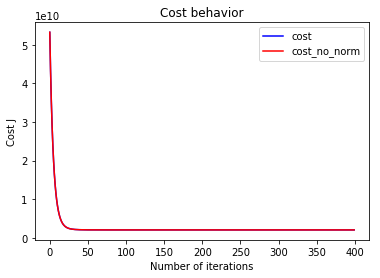

Theta computed from gradient descent: 
[[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]


In [11]:
from matplotlib import pyplot as plt

# Plot the convergence graph
plt.plot([i for i in range(num_iters)], J_history, '-b', label = 'cost')
plt.plot([i for i in range(num_iters)], J_history_no_norm, '-r', label = 'cost_no_norm')
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label
plt.title('Cost behavior')
plt.legend()
plt.show()
print("Theta computed from gradient descent: \n{}".format(theta))

### Let's introduce a method to find the minimum analytically: the Normal Equation
### The Normal Equation is a closed-form solution to linear regression then it has no need to choose alpha and iterations
### Proof
$$\large J({\theta}) = \frac{1}{2m} (X{\theta} - y)^T(X{\theta} - y) $$
$$\large = \frac{1}{2m} ((X{\theta})^T - y^T)(X{\theta} - y) $$
$$\large = \frac{1}{2m} [(X{\theta})^T(X{\theta}) - (X{\theta})^Ty - y^TX{\theta} +y^Ty] $$
$$\large = \frac{1}{2m} [\theta^TX^TX\theta - 2(X\theta)^Ty + y^Ty]$$
#### now we derive the expression and set it to zero in order to find the minimum:
$$\large \frac{\partial J(\theta)}{\partial \theta} = 2X^TX\theta - 2X^Ty = 0 $$
$$\large X^TX\theta = X^Ty $$
$$\large \theta = (X^TX)^{-1}X^Ty $$

In [9]:
def normalEquation(X, y):
    pseudo_inv = np.linalg.pinv(X.T.dot(X))
    product = pseudo_inv.dot(X.T)
    return product.dot(y)
theta_ne = normalEquation(X,y)
print(theta_ne)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


# Predict new values

In [10]:
x = np.array([1650, 3])
x = np.array([1, (x[0]-mu[0])/sigma[0], (x[1]-mu[1])/sigma[1]])
x = x.reshape((1, x.shape[0]))
price = x.dot(theta_ne)

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equation): {}'.format(price))

Predicted price of a 1650 sq-ft, 3 br house (using normal equation): [[293081.4643349]]


# Observation
## The Normal Equation is a good tool in order to solve for the theta parameters but it has some drawbacks: it needs to compute the inverse of a matrix (the cost is very high) and it is slow if the number of features is large.